In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from copy import deepcopy

from graph_embedding_continuity import *

In [2]:
N = 50
# Barabasi-Albert parameter
m = 5
# number of edge(s) to remove
k_remove = 1

## Discontinuous embedding under removal of an edge that disconnects the graph or a random intra-community edge

In [3]:
# generate a random graph that bridges to clusters
G1 = nx.barabasi_albert_graph(N, 2)
G2 = nx.barabasi_albert_graph(N, 2)

# relabel nodes of G2
d = {}
for v in G1.nodes:
    d[v] = N+v
G2 = nx.relabel_nodes(G2, d)

G = nx.union(G1, G2)

G.add_edge(N-1, N)
# add some random weights on each edge
for _, _, d in G.edges(data=True):
    d['weight'] = np.random.rand()
    
# save layout
pos = nx.spring_layout(G)

# create new graphs by removing either the bridge edge or an intra-community edge 
# (for instance the first one in the edge list), in different order.
u_removed, v_removed = list(G.edges)[0]

G1 = deepcopy(G)
G2 = deepcopy(G)
# remove bridge
G1.remove_edge(N-1, N)
# remove some edge
G2.remove_edge(u_removed, v_removed)

G12 = deepcopy(G1)
G21 = deepcopy(G2)
# remove some edge
G12.remove_edge(u_removed, v_removed)
# remove bridge
G21.remove_edge(N-1, N)

### Standard random walk

In [4]:
emb_std = rw_factorization_embedding(G, k=3, p=1.0, q=1.0, normalize=True, use_sparse=False)
emb_std_1 = rw_factorization_embedding(G1, k=3, p=1.0, q=1.0, normalize=True, use_sparse=False)
emb_std_2 = rw_factorization_embedding(G2, k=3, p=1.0, q=1.0, normalize=True, use_sparse=False)
emb_std_12 = rw_factorization_embedding(G12, k=3, p=1.0, q=1.0, normalize=True, use_sparse=False)
emb_std_21 = rw_factorization_embedding(G21, k=3, p=1.0, q=1.0, normalize=True, use_sparse=False)

### Depth-first incentive

In [5]:
emb_dfs = rw_factorization_embedding(G, k=3, p=1.0, q=1/3, normalize=True, use_sparse=False)
emb_dfs_1 = rw_factorization_embedding(G1, k=3, p=1.0, q=1/3, normalize=True, use_sparse=False)
emb_dfs_2 = rw_factorization_embedding(G2, k=3, p=1.0, q=1/3, normalize=True, use_sparse=False)
emb_dfs_12 = rw_factorization_embedding(G12, k=3, p=1.0, q=1/3, normalize=True, use_sparse=False)
emb_dfs_21 = rw_factorization_embedding(G21, k=3, p=1.0, q=1/3, normalize=True, use_sparse=False)

### Breadth-first incentive

In [6]:
emb_bfs = rw_factorization_embedding(G, k=3, p=1.0, q=3.0, normalize=True, use_sparse=False)
emb_bfs_1 = rw_factorization_embedding(G1, k=3, p=1.0, q=3.0, normalize=True, use_sparse=False)
emb_bfs_2 = rw_factorization_embedding(G2, k=3, p=1.0, q=3.0, normalize=True, use_sparse=False)
emb_bfs_12 = rw_factorization_embedding(G12, k=3, p=1.0, q=3.0, normalize=True, use_sparse=False)
emb_bfs_21 = rw_factorization_embedding(G21, k=3, p=1.0, q=3.0, normalize=True, use_sparse=False)


## Compare

### Standard

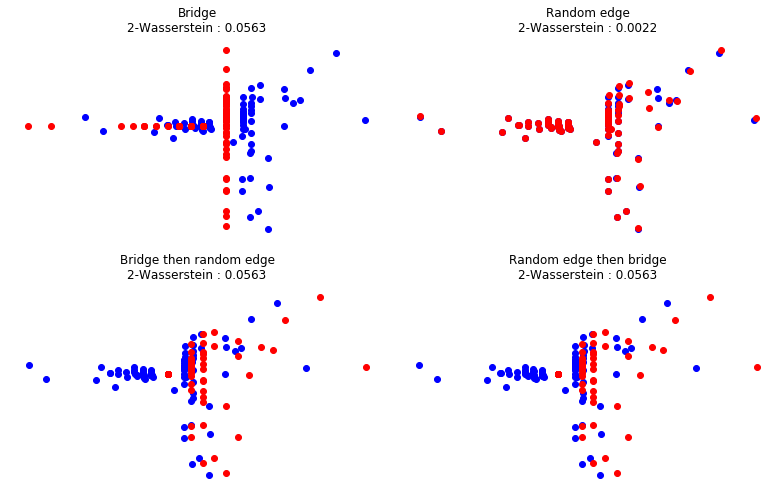

In [7]:
emb = emb_std[:, 1:]
emb_1 = emb_std_1[:, 1:]
emb_2 = emb_std_2[:, 1:]
emb_12 = emb_std_12[:, 1:]
emb_21 = emb_std_21[:, 1:]

# plot the graph
fig, axes = plt.subplots(figsize=(11, 7), nrows=2, ncols=2)

wass_1 = wasserstein_metric(emb, emb_1)
wass_2 = wasserstein_metric(emb, emb_2)
wass_12 = wasserstein_metric(emb, emb_12)
wass_21 = wasserstein_metric(emb, emb_21)

ax = axes[0, 0]
ax.scatter(emb[:, 0], emb[:, 1], label='original', color='b')
ax.scatter(emb_1[:, 0], emb_1[:, 1], label='removed', color='r')
ax.set_title('Bridge\n2-Wasserstein : {:.4f}'.format(wass_1))
ax.axis('off')

ax = axes[0, 1]
ax.scatter(emb[:, 0], emb[:, 1], label='original', color='b')
ax.scatter(emb_2[:, 0], emb_2[:, 1], label='removed', color='r')
ax.set_title('Random edge\n2-Wasserstein : {:.4f}'.format(wass_2))
ax.axis('off')

ax = axes[1, 0]
ax.scatter(emb[:, 0], emb[:, 1], label='original', color='b')
ax.scatter(emb_12[:, 0], emb_12[:, 1], label='removed', color='r')
ax.set_title('Bridge then random edge\n2-Wasserstein : {:.4f}'.format(wass_12))
ax.axis('off')

ax = axes[1, 1]
ax.scatter(emb[:, 0], emb[:, 1], label='original', color='b')
ax.scatter(emb_21[:, 0], emb_21[:, 1], label='removed', color='r')
ax.set_title('Random edge then bridge\n2-Wasserstein : {:.4f}'.format(wass_21))
ax.axis('off')

plt.tight_layout()
plt.show()

fig.savefig('rwf_std_commute.eps')

### DFS

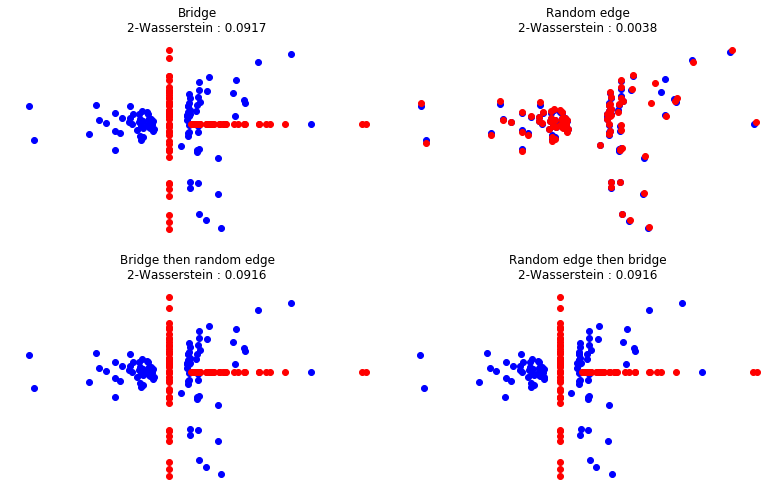

In [8]:
emb = emb_dfs[:, 1:]
emb_1 = emb_dfs_1[:, 1:]
emb_2 = emb_dfs_2[:, 1:]
emb_12 = emb_dfs_12[:, 1:]
emb_21 = emb_dfs_21[:, 1:]

# plot the graph
fig, axes = plt.subplots(figsize=(11, 7), nrows=2, ncols=2)

wass_1 = wasserstein_metric(emb, emb_1)
wass_2 = wasserstein_metric(emb, emb_2)
wass_12 = wasserstein_metric(emb, emb_12)
wass_21 = wasserstein_metric(emb, emb_21)

ax = axes[0, 0]
ax.scatter(emb[:, 0], emb[:, 1], label='original', color='b')
ax.scatter(emb_1[:, 0], emb_1[:, 1], label='removed', color='r')
ax.set_title('Bridge\n2-Wasserstein : {:.4f}'.format(wass_1))
ax.axis('off')

ax = axes[0, 1]
ax.scatter(emb[:, 0], emb[:, 1], label='original', color='b')
ax.scatter(emb_2[:, 0], emb_2[:, 1], label='removed', color='r')
ax.set_title('Random edge\n2-Wasserstein : {:.4f}'.format(wass_2))
ax.axis('off')

ax = axes[1, 0]
ax.scatter(emb[:, 0], emb[:, 1], label='original', color='b')
ax.scatter(emb_12[:, 0], emb_12[:, 1], label='removed', color='r')
ax.set_title('Bridge then random edge\n2-Wasserstein : {:.4f}'.format(wass_12))
ax.axis('off')

ax = axes[1, 1]
ax.scatter(emb[:, 0], emb[:, 1], label='original', color='b')
ax.scatter(emb_21[:, 0], emb_21[:, 1], label='removed', color='r')
ax.set_title('Random edge then bridge\n2-Wasserstein : {:.4f}'.format(wass_21))
ax.axis('off')

plt.tight_layout()
plt.show()

fig.savefig('rwf_dfs_commute.eps')

### BFS

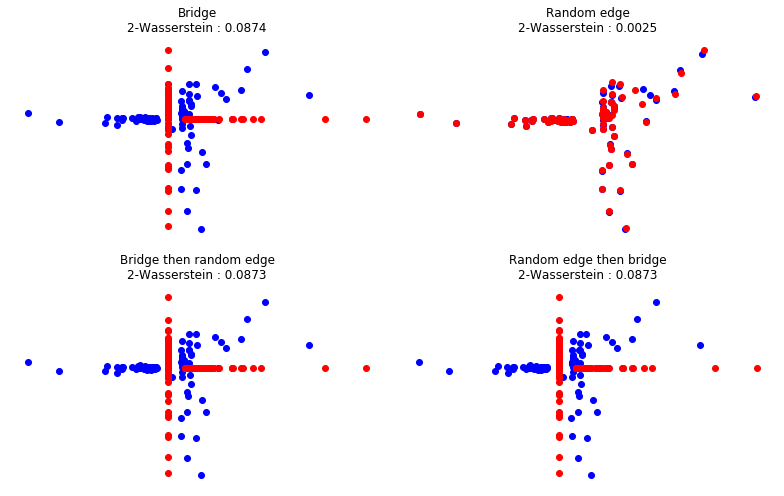

In [9]:
emb = emb_bfs[:, 1:]
emb_1 = emb_bfs_1[:, 1:]
emb_2 = emb_bfs_2[:, 1:]
emb_12 = emb_bfs_12[:, 1:]
emb_21 = emb_bfs_21[:, 1:]

# plot the graph
fig, axes = plt.subplots(figsize=(11, 7), nrows=2, ncols=2)

wass_1 = wasserstein_metric(emb, emb_1)
wass_2 = wasserstein_metric(emb, emb_2)
wass_12 = wasserstein_metric(emb, emb_12)
wass_21 = wasserstein_metric(emb, emb_21)

ax = axes[0, 0]
ax.scatter(emb[:, 0], emb[:, 1], label='original', color='b')
ax.scatter(emb_1[:, 0], emb_1[:, 1], label='removed', color='r')
ax.set_title('Bridge\n2-Wasserstein : {:.4f}'.format(wass_1))
ax.axis('off')

ax = axes[0, 1]
ax.scatter(emb[:, 0], emb[:, 1], label='original', color='b')
ax.scatter(emb_2[:, 0], emb_2[:, 1], label='removed', color='r')
ax.set_title('Random edge\n2-Wasserstein : {:.4f}'.format(wass_2))
ax.axis('off')

ax = axes[1, 0]
ax.scatter(emb[:, 0], emb[:, 1], label='original', color='b')
ax.scatter(emb_12[:, 0], emb_12[:, 1], label='removed', color='r')
ax.set_title('Bridge then random edge\n2-Wasserstein : {:.4f}'.format(wass_12))
ax.axis('off')

ax = axes[1, 1]
ax.scatter(emb[:, 0], emb[:, 1], label='original', color='b')
ax.scatter(emb_21[:, 0], emb_21[:, 1], label='removed', color='r')
ax.set_title('Random edge then bridge\n2-Wasserstein : {:.4f}'.format(wass_21))
ax.axis('off')

plt.tight_layout()
plt.show()

fig.savefig('rwf_bfs_commute.eps')

### Conclusion

RWF being a matrix factorization method, it does not care in what order edges are removed, the graph walk transition matrix is the same in either case. Numerically, the resulting embedding is the same regardless of which sequence of edge removals is applied.